## Math 32; Fall 2025
### Lectuer 20 - October 15, 2025; Suzanne Fernandes-Sindi
The following code is used to generate examples in Math 32 for Lecture 20. We will do 2 examples:

- Example 1: 🎲 Betting on Dice.
- Example 2: ✈️ Airline Overbooking Simulation
- Example 3: 🌡️ Temperature Transformation 


## 🎲 Betting on Dice.

**Goal:** Simulate rolling two dice and compute your winnings or losses.

You win \$1000 if the sum of the dice is 11 or 12.  

Otherwise, you lose \$100.

Expected Value of Winnings:
  Theoretical E[Y] = -8.33
  Empirical   E[Y] ≈ -8.64

Empirical PMF:
  P(Y = -100) ≈ 0.9170
  P(Y = 1000) ≈ 0.0830

Theoretical PMF:
  P(Y = 1000) = 0.0833
  P(Y = -100) = 0.9167


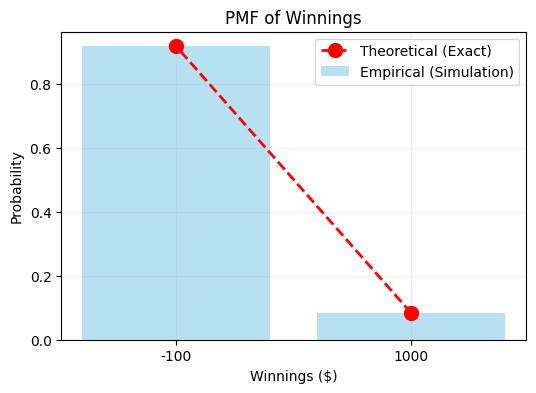

In [8]:
# 🎲 Dice Simulation Exercise
# Goal: Simulate rolling two dice and compute winnings/losses

import random
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------
# Step 1: Define parameters
# ----------------------------
n_trials = 1000000  # number of simulations
winnings = []      # list to store results

# ----------------------------
# Step 2: Run the simulation
# ----------------------------
for i in range(n_trials):
    # Roll two dice
    die1 = random.randint(1, 6)
    die2 = random.randint(1, 6)
    
    # Compute the sum
    total = die1 + die2
    
    # Compute the outcome
    if total >= 11:
        winnings.append(1000)
    else:
        winnings.append(-100)

# ----------------------------
# Step 3: Analyze the results
# ----------------------------
winnings = np.array(winnings)

# Empirical probabilities
unique, counts = np.unique(winnings, return_counts=True)
pmf_empirical = counts / n_trials

# Theoretical PMF
pmf_theoretical = {
    1000: 3/36,   # (11 or 12) → 2 + 1 = 3 outcomes
    -100: 33/36
}

# ----------------------------
# Step 4: Expected Value (E[Y])
# ----------------------------
# Theoretical expected value
E_Y_theoretical = sum(val * p for val, p in pmf_theoretical.items())

# Empirical expected value (sample mean)
E_Y_empirical = winnings.mean()

print("Expected Value of Winnings:")
print(f"  Theoretical E[Y] = {E_Y_theoretical:.2f}")
print(f"  Empirical   E[Y] ≈ {E_Y_empirical:.2f}\n")

# ----------------------------
# Step 5: Display results
# ----------------------------
print("Empirical PMF:")
for val, prob in zip(unique, pmf_empirical):
    print(f"  P(Y = {val}) ≈ {prob:.4f}")

print("\nTheoretical PMF:")
for val, prob in pmf_theoretical.items():
    print(f"  P(Y = {val}) = {prob:.4f}")

# ----------------------------
# Step 6: Visualize (clearer style)
# ----------------------------
fig, ax = plt.subplots(figsize=(6,4))

# Bars for empirical PMF
ax.bar(unique.astype(str), pmf_empirical, alpha=0.6, color='skyblue', label='Empirical (Simulation)')

# Dots + dashed line for theoretical PMF
x_theo = [str(k) for k in pmf_theoretical.keys()]
y_theo = list(pmf_theoretical.values())
ax.plot(x_theo, y_theo, 'o--', color='red', label='Theoretical (Exact)', markersize=10, lw=2)

ax.set_title("PMF of Winnings")
ax.set_xlabel("Winnings ($)")
ax.set_ylabel("Probability")
ax.legend()
ax.grid(alpha=0.2)
plt.show()


## ✈️ Airline Ticket Overbooking Simulation

**Goal:** Simulate ticket sales for a flight with 150 seats and determine the distribution of passengers who are refused a seat.

- Let $X \sim \text{Uniform}\{1,2,\dots,200\}$be the number of tickets sold.  
- If more than 150 tickets are sold, \(Y = X - 150\) passengers will be refused a seat.  
- Otherwise, \(Y = 0\).

Compare the **empirical distribution** of \(Y\) from simulation with the **theoretical distribution**:

$$
P(Y=y) =
\begin{cases} 
0.75, & \text{if } y = 0 \\
\frac{1}{200}, & \text{if } y = 1,2,\dots,50
\end{cases}
$$


Empirical PMF (first few values):
  P(Y = 0) ≈ 0.7517
  P(Y = 1) ≈ 0.0048
  P(Y = 2) ≈ 0.0053
  P(Y = 3) ≈ 0.0046
  P(Y = 4) ≈ 0.0056
  P(Y = 5) ≈ 0.0052
  P(Y = 6) ≈ 0.0048
  P(Y = 7) ≈ 0.0051
  P(Y = 8) ≈ 0.0049
  P(Y = 9) ≈ 0.0055

Theoretical PMF (first few values):
  P(Y = 0) = 0.7500
  P(Y = 1) = 0.0050
  P(Y = 2) = 0.0050
  P(Y = 3) = 0.0050
  P(Y = 4) = 0.0050
  P(Y = 5) = 0.0050
  P(Y = 6) = 0.0050
  P(Y = 7) = 0.0050
  P(Y = 8) = 0.0050
  P(Y = 9) = 0.0050


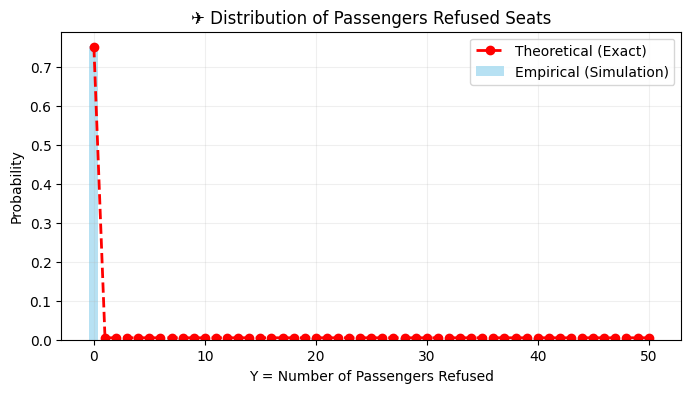

In [9]:
# ✈️ Airline Overbooking Simulation
# Model:
#   X ~ Uniform{1,...,200}  (tickets sold)
#   Y = max(0, X - 150)     (passengers without seats)
# Goal: Compare empirical and theoretical PMFs of Y

import random
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------
# Step 1: Simulation parameters
# ----------------------------
n_trials = 100000  # number of simulations
Y_list = []

# ----------------------------
# Step 2: Run the simulation
# ----------------------------
for i in range(n_trials):
    X = random.randint(1, 200)  # discrete uniform
    Y = max(0, X - 150)         # passengers refused seat
    Y_list.append(Y)

Y_arr = np.array(Y_list)

# ----------------------------
# Step 3: Empirical PMF
# ----------------------------
unique, counts = np.unique(Y_arr, return_counts=True)
pmf_empirical = counts / n_trials

# ----------------------------
# Step 4: Theoretical PMF
# ----------------------------
pmf_theoretical = {}
pmf_theoretical[0] = 0.75
for y in range(1, 51):  # y = 1,2,...,50
    pmf_theoretical[y] = 1/200

# Convert to arrays for plotting
x_theo = list(pmf_theoretical.keys())
y_theo = list(pmf_theoretical.values())

# ----------------------------
# Step 5: Display results
# ----------------------------
print("Empirical PMF (first few values):")
for val, prob in list(zip(unique, pmf_empirical))[:10]:
    print(f"  P(Y = {val}) ≈ {prob:.4f}")

print("\nTheoretical PMF (first few values):")
for y in range(0, 10):
    print(f"  P(Y = {y}) = {pmf_theoretical[y]:.4f}")

# ----------------------------
# Step 6: Visualize — bars vs dots
# ----------------------------
fig, ax = plt.subplots(figsize=(8,4))

# Empirical PMF as blue bars
ax.bar(unique, pmf_empirical, alpha=0.6, color='skyblue', label='Empirical (Simulation)')

# Theoretical PMF as red dots + dashed line
ax.plot(x_theo, y_theo, 'o--', color='red', label='Theoretical (Exact)', markersize=6, lw=2)

ax.set_title("✈️ Distribution of Passengers Refused Seats")
ax.set_xlabel("Y = Number of Passengers Refused")
ax.set_ylabel("Probability")
ax.legend()
ax.grid(alpha=0.2)
plt.show()


## 🌡️ Temperature Transformation 

**Goal:** Simulate and verify how a temperature measurement in Fahrenheit transforms when converted to Kelvin.

You have established that the temperature \( X \) of your beer-fermentation carboy (in °F) follows a normal distribution:

$$X \sim \mathcal{N}(\mu = 68, \, \sigma^2 = 16)$$

Your physicist friend insists that all temperatures must be measured in **Kelvin**, using the transformation:

$$Y = \frac{5}{9}X + 255.37$$

1. Simulate many samples of \( X \) in Fahrenheit.  
2. Transform them to Kelvin to get \( Y \).  
3. Compare the **empirical** mean and standard deviation of \( Y \)  
   with the **theoretical** values given by the linear transformation rules:

$$\mu_Y = a \mu_X + b, \quad \sigma_Y = |a| \sigma_X$$

Finally, plot a histogram of your simulated \( Y \) values and overlay the theoretical normal curve to confirm that \( Y \) is also normally distributed.


Empirical (from simulation):
  X: mean = 67.9951,  std = 4.0051
  Y: mean = 293.1451,  std = 2.2251

Theoretical (exact):
  mu_Y = a * mu_X + b = 293.1478
  sigma_Y = |a| * sigma_X = 2.2222


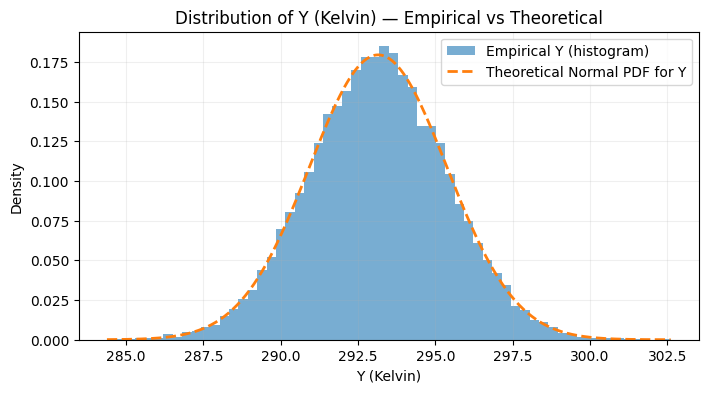


Differences (empirical - theoretical):
  mean difference = -2.7015e-03
  std  difference = 2.8497e-03


In [6]:
# 🍺 Temperature units transformation exercise
# X ~ N(mu_X=68, sigma_X^2=16) measured in Fahrenheit
# Y = (5/9)*X + 255.37  (Kelvin)
# Show by simulation that Y is normal and compute empirical vs theoretical mean/std

import random
import numpy as np
import matplotlib.pyplot as plt
import math

# ----------------------------
# Parameters
# ----------------------------
n_trials = 20000            # number of simulated measurements
mu_X = 68.0                 # mean of X (F)
sigma_X = 4.0               # std dev of X (sqrt(16))

# transformation constants
a = 5.0/9.0                 # scale factor
b = 255.37                  # additive offset

# ----------------------------
# Simulate using an explicit loop
# ----------------------------
X_list = []
Y_list = []

for i in range(n_trials):
    # draw one Fahrenheit measurement
    x = random.gauss(mu_X, sigma_X)   # normal with mean mu_X and sd sigma_X
    X_list.append(x)
    
    # transform to Kelvin
    y = a * x + b
    Y_list.append(y)

# convert to numpy arrays for convenient calculations
X_arr = np.array(X_list)
Y_arr = np.array(Y_list)

# ----------------------------
# Empirical summaries
# ----------------------------
emp_mu_X = X_arr.mean()
emp_sigma_X = X_arr.std(ddof=0)   # population std (ddof=0) to match theoretical sigma

emp_mu_Y = Y_arr.mean()
emp_sigma_Y = Y_arr.std(ddof=0)

print("Empirical (from simulation):")
print(f"  X: mean = {emp_mu_X:.4f},  std = {emp_sigma_X:.4f}")
print(f"  Y: mean = {emp_mu_Y:.4f},  std = {emp_sigma_Y:.4f}")

# ----------------------------
# Theoretical mean & std for Y
# For linear transform Y = a X + b:
#   mu_Y = a * mu_X + b
#   sigma_Y = |a| * sigma_X
# ----------------------------
theo_mu_Y = a * mu_X + b
theo_sigma_Y = abs(a) * sigma_X

print("\nTheoretical (exact):")
print(f"  mu_Y = a * mu_X + b = {theo_mu_Y:.4f}")
print(f"  sigma_Y = |a| * sigma_X = {theo_sigma_Y:.4f}")

# ----------------------------
# Visual: histogram of Y and overlay theoretical normal PDF
# ----------------------------
def normal_pdf(x, mu, sigma):
    return (1.0 / (math.sqrt(2*math.pi) * sigma)) * np.exp(-0.5 * ((x - mu)/sigma)**2)

plt.figure(figsize=(8,4))
# histogram (density=True so it approximates pdf)
counts, bins, _ = plt.hist(Y_arr, bins=60, density=True, alpha=0.6, label='Empirical Y (histogram)')

# x values for pdf
x_vals = np.linspace(Y_arr.min(), Y_arr.max(), 400)
pdf_vals = normal_pdf(x_vals, theo_mu_Y, theo_sigma_Y)

plt.plot(x_vals, pdf_vals, lw=2, label='Theoretical Normal PDF for Y', linestyle='--')
plt.title('Distribution of Y (Kelvin) — Empirical vs Theoretical')
plt.xlabel('Y (Kelvin)')
plt.ylabel('Density')
plt.legend()
plt.grid(alpha=0.2)
plt.show()

# ----------------------------
# Quick checks (differences)
# ----------------------------
print("\nDifferences (empirical - theoretical):")
print(f"  mean difference = {emp_mu_Y - theo_mu_Y:.4e}")
print(f"  std  difference = {emp_sigma_Y - theo_sigma_Y:.4e}")
